<a href="https://colab.research.google.com/github/srv/opencosmos/blob/main/opencosmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## GITHUB AND DRIVE MOUNT ##

if "setup" not in globals():
  !git clone https://@github.com/srv/opencosmos.git
  from google.colab import drive
  drive.mount('/content/drive')
  setup = True
# drive.flush_and_unmount()

Cloning into 'opencosmos'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 97 (delta 48), reused 43 (delta 13), pack-reused 0 (from 0)
Receiving objects: 100% (97/97), 19.82 MiB | 32.53 MiB/s, done.
Resolving deltas: 100% (48/48), done.
Mounted at /content/drive


In [2]:
## INSTALLS AND IMPORTS ##

# use % for terminal commands (e.g. %ls)

!pip install matplotlib
!pip install rasterio
import rasterio
import rasterio.plot
from rasterio.plot import show
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 93.2 MB/s eta 0:00:00


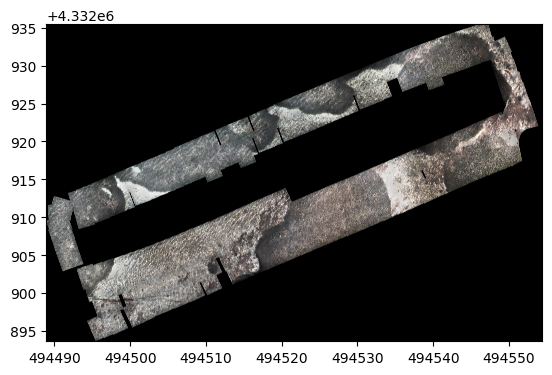

mosaic shape: (6948, 10757)
mosaic crs: EPSG:25831


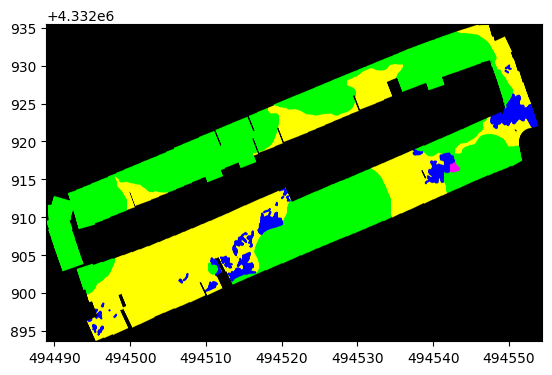

mosaic_seg shape: (6948, 10757)
mosaic_seg crs: EPSG:25831


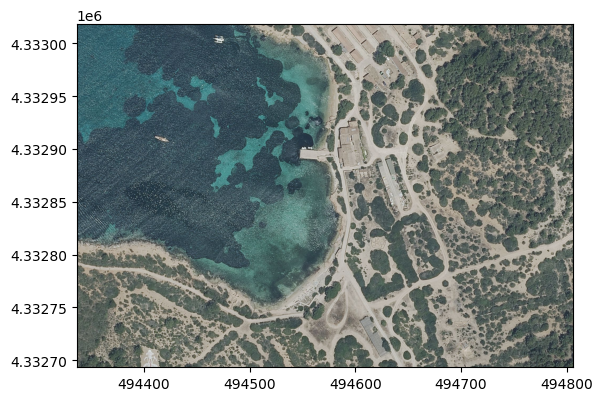

ortofoto shape: (1299, 1878)
ortofoto crs: EPSG:25831


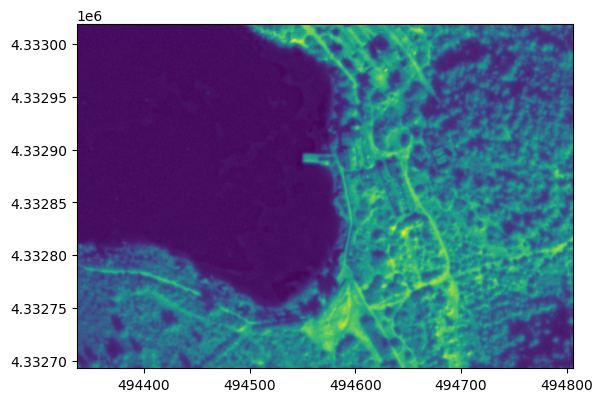

geosat shape: (434, 626)
geosat crs: EPSG:25831


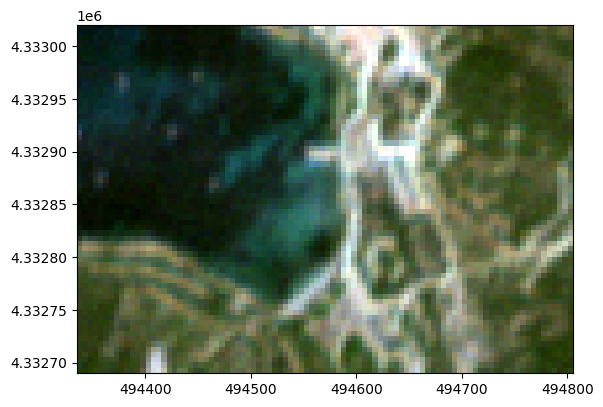

platero shape: (66, 94)
platero crs: EPSG:25831


In [4]:
## IMPORTS ##
# --- Mosaic ---
mosaic_path = "drive/MyDrive/opencosmos/data/cabrera_geoloc/tifs_25831/cabrera_05_02_2025.tif"
mosaic_tif = rasterio.open(mosaic_path)
rasterio.plot.show(mosaic_tif)
print("mosaic shape:", mosaic_tif.shape)
print("mosaic crs:", mosaic_tif.crs)

# --- Mosaic segmentation ---
mosaic_seg_path = "drive/MyDrive/opencosmos/data/cabrera_geoloc/tifs_25831/cabrera_seg_05_02_2025.tif"
mosaic_seg_tif = rasterio.open(mosaic_seg_path)
rasterio.plot.show(mosaic_seg_tif)
print("mosaic_seg shape:", mosaic_seg_tif.shape)
print("mosaic_seg crs:", mosaic_seg_tif.crs)

# --- Ortofoto ---
ortofoto_path = "drive/MyDrive/opencosmos/data/cabrera_geoloc/tifs_25831/clip_ortofoto_Cabrera_2024.tif"
ortofoto_tif = rasterio.open(ortofoto_path)
rasterio.plot.show(ortofoto_tif)
print("ortofoto shape:", ortofoto_tif.shape)
print("ortofoto crs:", ortofoto_tif.crs)

# --- Geosat ---
geosat_path = "drive/MyDrive/opencosmos/data/cabrera_geoloc/tifs_25831/Clip_Geosat_Cabrera_20230204.tif"
geosat_tif = rasterio.open(geosat_path)
rasterio.plot.show(geosat_tif)
print("geosat shape:", geosat_tif.shape)
print("geosat crs:", geosat_tif.crs)

# --- Platero ---
platero_path = "drive/MyDrive/opencosmos/data/cabrera_geoloc/tifs_25831/clip_Platero_20250809.tif"
platero_tif = rasterio.open(platero_path)
rasterio.plot.show(platero_tif)
print("platero shape:", platero_tif.shape)
print("platero crs:", platero_tif.crs)






Target grid (Geosat clipped):
  Transform: | 0.75, 0.00, 494488.50|
| 0.00,-0.75, 4332936.00|
| 0.00, 0.00, 1.00|
  Width, Height: 88 57
  CRS: EPSG:25831
Mosaic Resampled (Geosat Grid) - shape: (4, 57, 88)


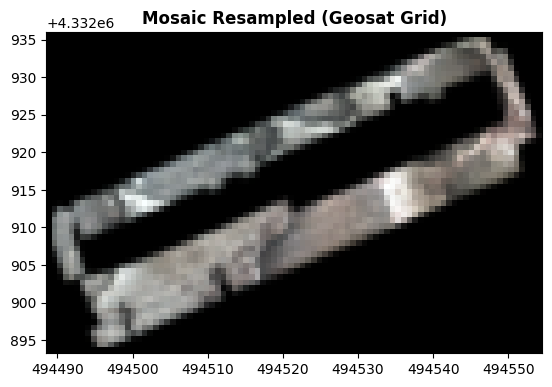

Mosaic Segmentation Resampled (Geosat Grid) - shape: (4, 57, 88)


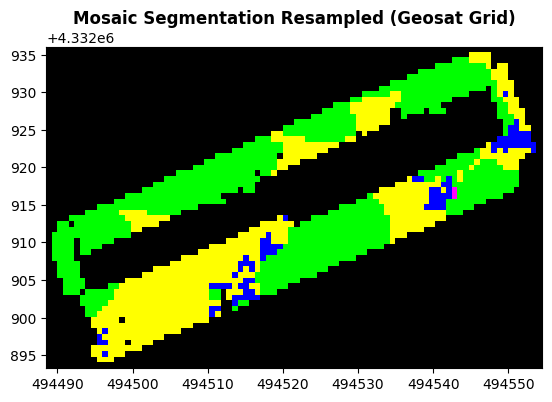

Ortofoto Resampled (Geosat Grid) - shape: (3, 57, 88)


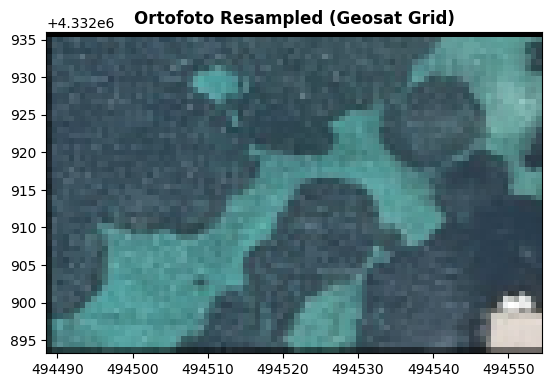

Geosat (Reference) - shape: (4, 57, 88)


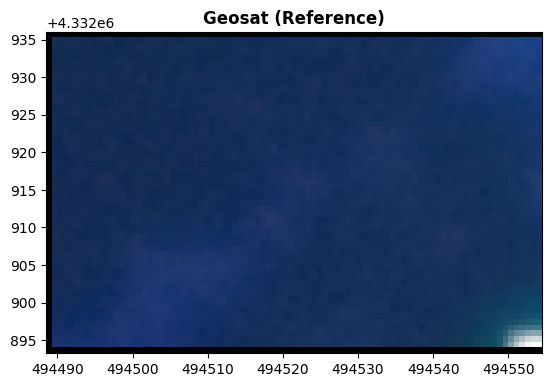

Platero Resampled (Geosat Grid) - shape: (3, 57, 88)


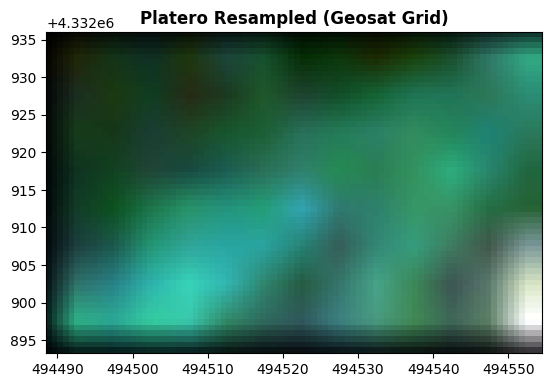


--- Shape check (all should match) ---
Mosaic: (4, 57, 88)
Mosaic Seg: (4, 57, 88)
Ortofoto: (3, 57, 88)
Geosat: (4, 57, 88)
Platero: (3, 57, 88)


In [40]:
from shapely.geometry import box
from rasterio.mask import mask
import rasterio.plot

# 1️⃣ Create a polygon of the mosaic bounds
mosaic_bounds_geom = [box(*mosaic_tif.bounds)]  # list of one polygon

# 2️⃣ Define a helper function to clip any raster
def clip_raster(src_tif, bounds_geom):
    """Clip a raster to the given bounds geometry"""
    clipped_data, clipped_transform = mask(src_tif, bounds_geom, crop=True)
    return clipped_data, clipped_transform

# 3️⃣ Clip all rasters
mosaic_clip, mosaic_clip_transform = clip_raster(mosaic_tif, mosaic_bounds_geom)
rasterio.plot.show(mosaic_clip, transform=mosaic_clip_transform, title="Mosaic Clip")
print("mosaic_clip shape:", mosaic_clip.shape)

mosaic_seg_clip, mosaic_seg_clip_transform = clip_raster(mosaic_seg_tif, mosaic_bounds_geom)
rasterio.plot.show(mosaic_seg_clip, transform=mosaic_seg_clip_transform, title="Mosaic Segmentation Clip")
print("mosaic_seg_clip shape:", mosaic_seg_clip.shape)

ortofoto_clip, ortofoto_clip_transform = clip_raster(ortofoto_tif, mosaic_bounds_geom)
rasterio.plot.show(ortofoto_clip, transform=ortofoto_clip_transform, title="Ortofoto Clip")
print("ortofoto_clip shape:", ortofoto_clip.shape)

geosat_clip, geosat_clip_transform = clip_raster(geosat_tif, mosaic_bounds_geom)
rasterio.plot.show(geosat_clip[0], transform=geosat_clip_transform, title="Geosat Clip (Band 1)")
print("geosat_clip shape:", geosat_clip.shape)

platero_clip, platero_clip_transform = clip_raster(platero_tif, mosaic_bounds_geom)
rasterio.plot.show(platero_clip, transform=platero_clip_transform, title="Platero Clip")
print("platero_clip shape:", platero_clip.shape)

Target grid (Geosat clipped):
  Transform: | 0.75, 0.00, 494488.50|
| 0.00,-0.75, 4332936.00|
| 0.00, 0.00, 1.00|
  Width, Height: 88 57
  CRS: EPSG:25831
Mosaic Resampled (Geosat Grid) - shape: (4, 57, 88)


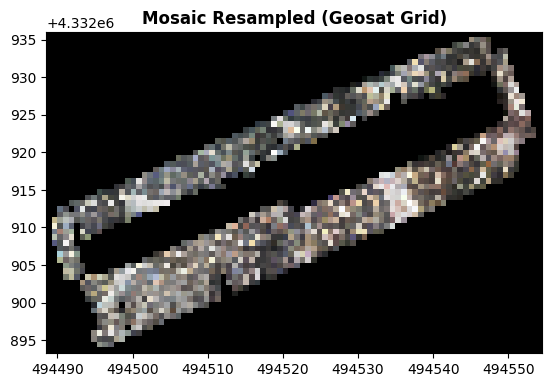

Mosaic Segmentation Resampled (Geosat Grid) - shape: (4, 57, 88)


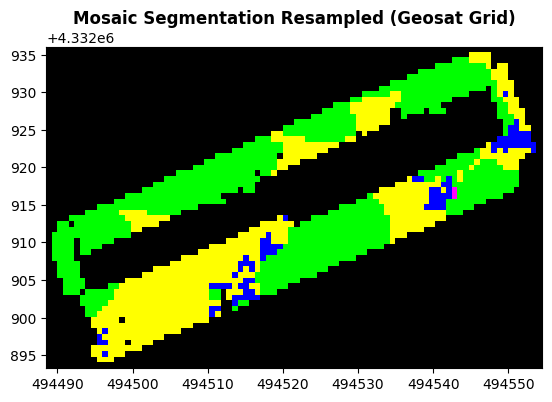

Ortofoto Resampled (Geosat Grid) - shape: (3, 57, 88)


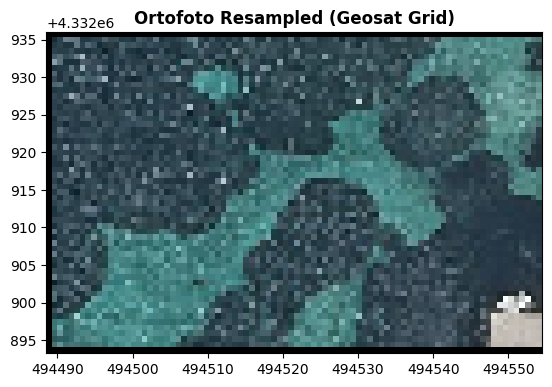

Geosat (Reference) - shape: (4, 57, 88)


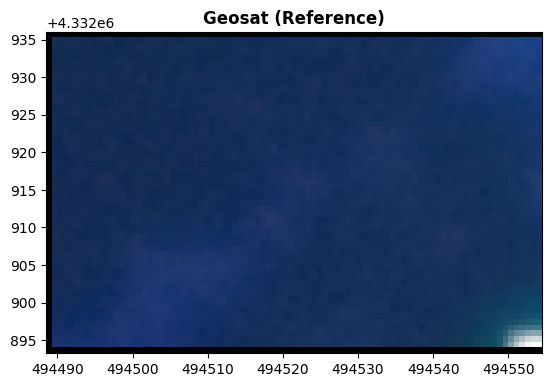

Platero Resampled (Geosat Grid) - shape: (3, 57, 88)


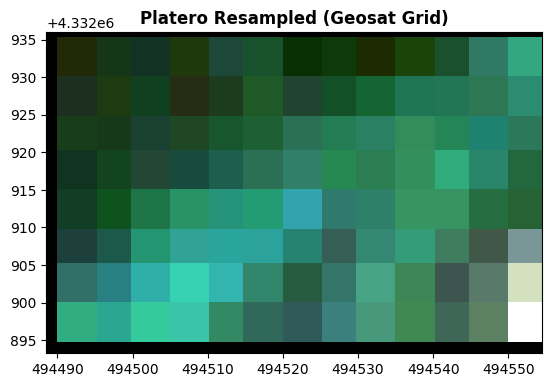


--- Shape check (all should match) ---
Mosaic: (4, 57, 88)
Mosaic Seg: (4, 57, 88)
Ortofoto: (3, 57, 88)
Geosat: (4, 57, 88)
Platero: (3, 57, 88)


In [42]:
import rasterio
from rasterio.warp import reproject, Resampling
import rasterio.plot
import numpy as np
import math
from rasterio.transform import from_origin, array_bounds

# --- Function to compute target grid (not used but handy for debugging) ---
def compute_target_grid(clipped_shape, clipped_transform, target_res):
    h, w = clipped_shape[1], clipped_shape[2]
    left, bottom, right, top = array_bounds(h, w, clipped_transform)
    res_x, res_y = target_res
    width = math.ceil((right - left) / res_x)
    height = math.ceil((top - bottom) / abs(res_y))
    target_transform = from_origin(left, top, res_x, abs(res_y))
    return target_transform, width, height

# --- Resample function ---
def resample_clipped(src_array, src_transform, src_crs,
                     target_transform, target_crs,
                     target_height, target_width,
                     resampling=Resampling.nearest):
    dst = np.empty((src_array.shape[0], target_height, target_width), dtype=src_array.dtype)
    reproject(
        source=src_array,
        destination=dst,
        src_transform=src_transform,
        src_crs=src_crs,
        dst_transform=target_transform,
        dst_crs=target_crs,
        resampling=resampling,
        src_nodata=None,
        dst_nodata=0
    )
    return dst

# --- Target = Geosat clipped grid ---
target_transform = geosat_clip_transform
target_crs = geosat_tif.crs
target_width = geosat_clip.shape[2]
target_height = geosat_clip.shape[1]

print("Target grid (Geosat clipped):")
print("  Transform:", target_transform)
print("  Width, Height:", target_width, target_height)
print("  CRS:", target_crs)

# --- Resample all clipped rasters to Geosat grid ---
mosaic_resampled = resample_clipped(
    mosaic_clip, mosaic_clip_transform, mosaic_tif.crs,
    target_transform, target_crs, target_height, target_width,
    resampling=Resampling.nearest)

mosaic_seg_resampled = resample_clipped(
    mosaic_seg_clip, mosaic_seg_clip_transform, mosaic_seg_tif.crs,
    target_transform, target_crs, target_height, target_width,
    resampling=Resampling.nearest)

ortofoto_resampled = resample_clipped(
    ortofoto_clip, ortofoto_clip_transform, ortofoto_tif.crs,
    target_transform, target_crs, target_height, target_width,
    resampling=Resampling.nearest)

platero_resampled = resample_clipped(
    platero_clip, platero_clip_transform, platero_tif.crs,
    target_transform, target_crs, target_height, target_width,
    resampling=Resampling.nearest)

geosat_resampled = geosat_clip  # already in target grid

# --- Plotting with scaling ---
def plot_raster_scaled(array, transform, title):
    bands, h, w = array.shape
    print(f"{title} - shape: {array.shape}")
    if bands >= 3:
        scaled = np.zeros_like(array, dtype=np.float32)
        for i in range(3):
            b = array[i].astype(np.float32)
            min_val, max_val = np.nanmin(b), np.nanmax(b)
            if max_val > min_val:
                scaled[i] = (b - min_val) / (max_val - min_val)
            else:
                scaled[i] = b
        rasterio.plot.show(scaled[[0, 1, 2]], transform=transform, title=title)
    else:
        b = array[0].astype(np.float32)
        min_val, max_val = np.nanmin(b), np.nanmax(b)
        if max_val > min_val:
            b_scaled = (b - min_val) / (max_val - min_val)
        else:
            b_scaled = b
        rasterio.plot.show(b_scaled, transform=transform, title=title)

# --- Plot all rasters ---
plot_raster_scaled(mosaic_resampled, target_transform, "Mosaic Resampled (Geosat Grid)")
plot_raster_scaled(mosaic_seg_resampled, target_transform, "Mosaic Segmentation Resampled (Geosat Grid)")
plot_raster_scaled(ortofoto_resampled, target_transform, "Ortofoto Resampled (Geosat Grid)")
plot_raster_scaled(geosat_resampled, target_transform, "Geosat (Reference)")
plot_raster_scaled(platero_resampled, target_transform, "Platero Resampled (Geosat Grid)")

# --- Shape & consistency checks ---
print("\n--- Shape check (all should match) ---")
print("Mosaic:", mosaic_resampled.shape)
print("Mosaic Seg:", mosaic_seg_resampled.shape)
print("Ortofoto:", ortofoto_resampled.shape)
print("Geosat:", geosat_resampled.shape)
print("Platero:", platero_resampled.shape)


Unique RGB colors in the reference image (first 3 channels):
[0 0 0]
[  0   0 255]
[  0 255   0]
[255   0 255]
[255 255   0]


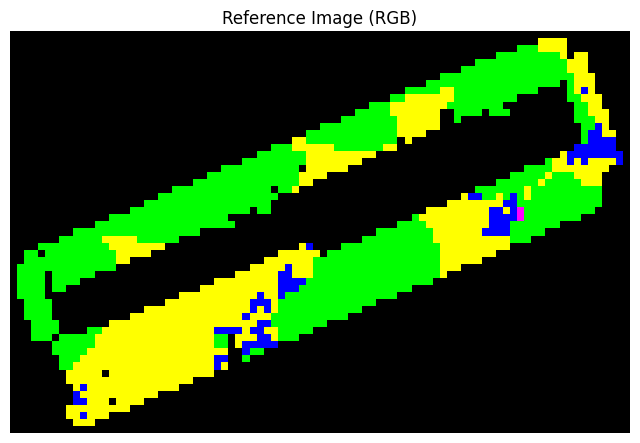

New shape with NDVI + 3 PCA layers: (8, 57, 88)
Normalized per-layer minimums:
 [ 0.          0.          0.          0.         -0.50497866 -0.34154437
 -0.02966915 -0.00337234]
Normalized per-layer maximums:
 [0.09684901 0.06161593 0.05279622 0.04632639 0.22916456 0.39213959
 0.09794129 0.05230553]
Number of unique values per layer:
 [538 431 613 432]
Number of unique values per layer:
 [ 538  431  613  432 4501 4785 4785 4785]


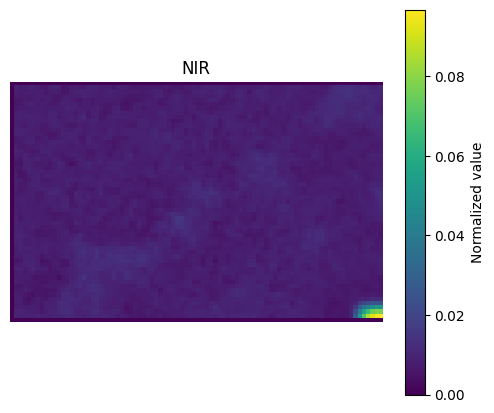

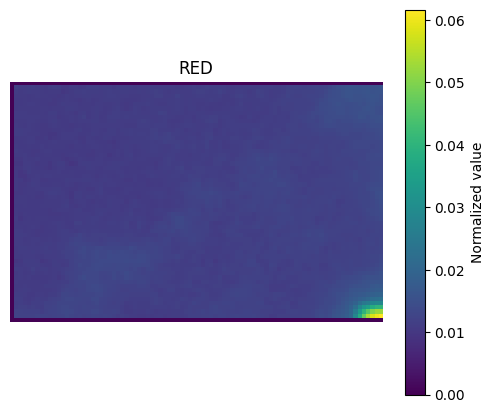

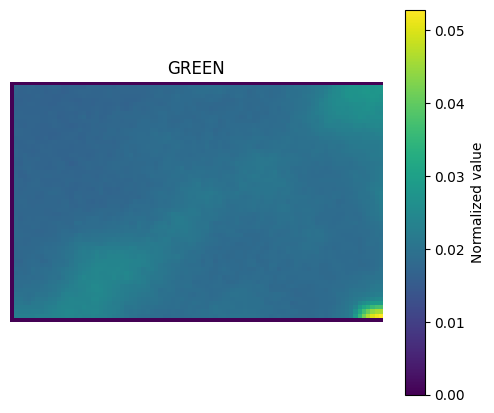

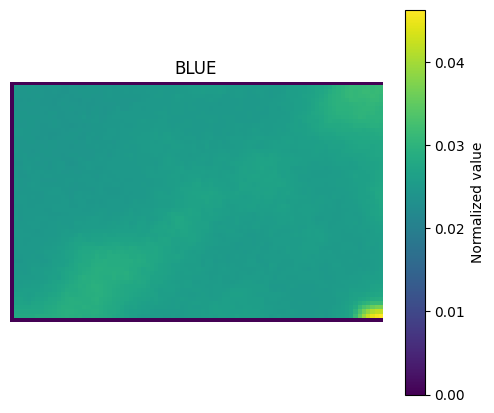

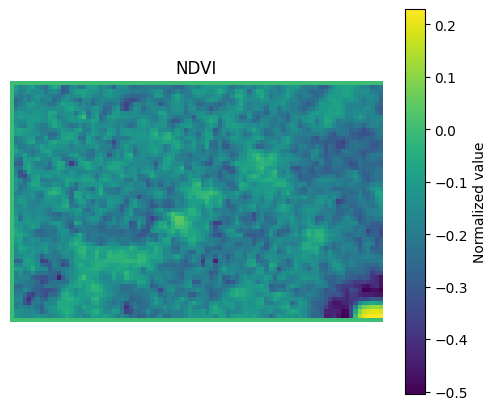

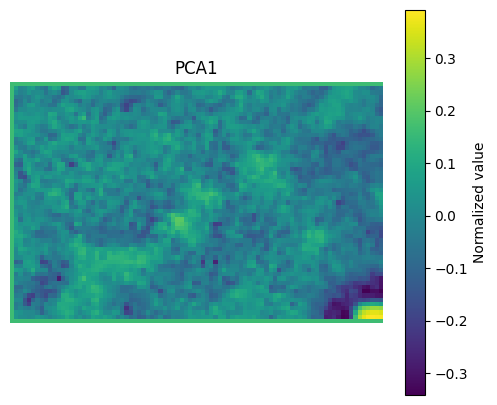

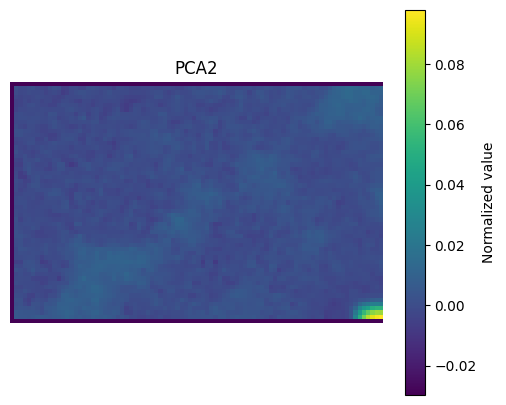

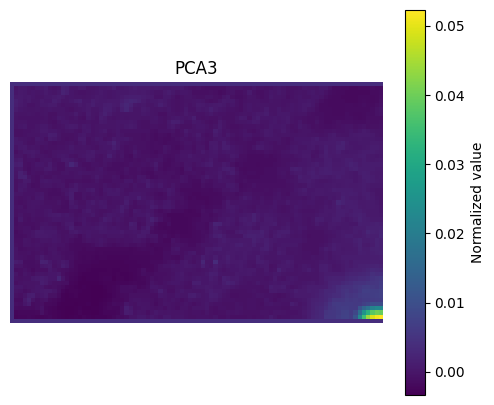

In [98]:
## COMPARE ##

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import numpy as np
from sklearn.decomposition import PCA

# --- 1. Load reference and target ---
ref = mosaic_seg_resampled

# --- 1. Normalize geosat_resampled using UInt16 full range ---
min_val = 0
max_val = 65535
geosat_resampled_normalized = (geosat_resampled - min_val) / (max_val - min_val + 1e-10)

# --- 2. Compute NDVI and append as new layer ---
ndvi = (geosat_resampled_normalized[0] - geosat_resampled_normalized[1]) / \
       (geosat_resampled_normalized[0] + geosat_resampled_normalized[1] + 1e-10)
ndvi = np.expand_dims(ndvi, axis=0)
geosat_resampled_normalized = np.concatenate((geosat_resampled_normalized, ndvi), axis=0)

# --- 3. Prepare data for PCA (layers x height x width → pixels x features) ---
layers, H, W = geosat_resampled_normalized.shape
X = geosat_resampled_normalized.reshape(layers, -1).T  # shape: (H*W, layers)

# --- 4. Apply PCA (3 components) ---
n_components = 3
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)  # shape: (H*W, 3)

# --- 5. Reshape PCA components back to 2D layers ---
pca_layers = X_pca.T.reshape(n_components, H, W)  # shape: (3, H, W)

# --- 6. Append PCA layers to the normalized array ---
pca1 = np.expand_dims(pca_layers[0], axis=0)
pca2 = np.expand_dims(pca_layers[1], axis=0)
pca3 = np.expand_dims(pca_layers[2], axis=0)

geosat_resampled_normalized = np.concatenate((geosat_resampled_normalized, pca1, pca2, pca3),axis=0)

print("New shape with NDVI + 3 PCA layers:", geosat_resampled_normalized.shape)

norm_min = geosat_resampled_normalized.min(axis=(1, 2), keepdims=True)
norm_max = geosat_resampled_normalized.max(axis=(1, 2), keepdims=True)
print("Normalized per-layer minimums:\n", norm_min.squeeze())
print("Normalized per-layer maximums:\n", norm_max.squeeze())

# Count unique values per layer
unique_counts = np.array([np.unique(layer).size for layer in geosat_resampled])
print("Number of unique values per layer:\n", unique_counts)
unique_counts = np.array([np.unique(layer).size for layer in geosat_resampled_normalized])
print("Number of unique values per layer:\n", unique_counts)

import matplotlib.pyplot as plt

layers, H, W = geosat_resampled_normalized.shape

# Optional: create layer names for clarity
layer_names = ['NIR','RED','GREEN','BLUE','NDVI', 'PCA1', 'PCA2', 'PCA3']

for i in range(layers):
    plt.figure(figsize=(6, 5))
    plt.imshow(geosat_resampled_normalized[i], cmap='viridis')  # you can change colormap
    plt.title(layer_names[i] if i < len(layer_names) else f'Layer {i+1}')
    plt.colorbar(label='Normalized value')
    plt.axis('off')
    plt.show()


Selected layers (by name): ['NIR', 'Red', 'Green', 'Blue', 'NDVI']
Selected classes: ['Alive Po', 'Sand', 'Others']
Training features shape: (1512, 5)
Training labels shape: (1512,)


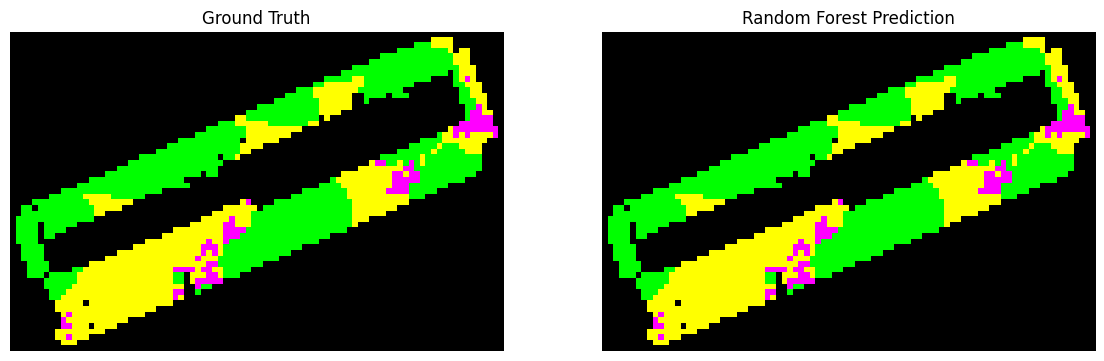

Confusion Matrix:
 [[832   0   0]
 [  0 591   0]
 [  0   0  89]]
Classification Report:
               precision    recall  f1-score   support

    Alive Po       1.00      1.00      1.00       832
        Sand       1.00      1.00      1.00       591
      Others       1.00      1.00      1.00        89

    accuracy                           1.00      1512
   macro avg       1.00      1.00      1.00      1512
weighted avg       1.00      1.00      1.00      1512

Overall Accuracy: 1.0000


In [99]:
## FOREST ##

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# -----------------------------
# 0. Select classes and layers
# -----------------------------

class_names = ["Alive Po", "Dead Po", "Rocks", "Sand"]
selected_class_names = ["Alive Po", "Sand"]

layer_names = ["NIR", "Red", "Green", "Blue", "NDVI", "PCA1", "PCA2", "PCA3"]
selected_layer_names = ["NIR", "Red", "Green", "Blue", "NDVI"]

# -----------------------------
# 1. Pre-mask ref and geosat
# -----------------------------
alpha_mask = ref[3] > 0
geosat_rgb = geosat_resampled_normalized[[1, 2, 3]]
geosat_not_black = np.any(geosat_rgb > 0, axis=0)
combined_mask = alpha_mask & geosat_not_black

# Apply mask
ref_masked = np.zeros_like(ref)
geosat_masked = np.zeros_like(geosat_resampled_normalized)
for i in range(ref.shape[0]):
    ref_masked[i] = ref[i] * combined_mask
for i in range(geosat_resampled_normalized.shape[0]):
    geosat_masked[i] = geosat_resampled_normalized[i] * combined_mask

# -----------------------------
# 2. Map RGB to numeric classes by name
# -----------------------------
class_name_to_rgb = {
    "Alive Po": (0, 255, 0),
    "Dead Po": (0, 0, 255),
    "Rocks": (255, 0, 0),
    "Sand": (255, 255, 0),
    "Others": (255, 0, 255),
}

# "Others" class index (comes after selected classes)
others_class_index = len(selected_class_names)

# Initialize labels as -1 (background / ignored)
labels = np.full(ref.shape[1:], -1, dtype=int)

# Assign labels for all known RGBs
for name, rgb in class_name_to_rgb.items():
    mask = (
        (ref_masked[0] == rgb[0]) &
        (ref_masked[1] == rgb[1]) &
        (ref_masked[2] == rgb[2])
    )

    if name in selected_class_names:
        labels[mask] = selected_class_names.index(name)
    else:
        # Any non-selected but known class → "Others"
        labels[mask] = others_class_index

# Exclude background (alpha=0)
background_mask = ref[3] == 0

# Valid pixels for training (no background)
valid_pixels = combined_mask & (~background_mask) & (labels >= 0)

# -----------------------------
# 3. Prepare features and target
# -----------------------------
selected_layers = [layer_names.index(name) for name in selected_layer_names]
X_full = geosat_masked[selected_layers].reshape(len(selected_layers), -1).T
y = labels.flatten()
X_train = X_full[valid_pixels.flatten()]
y_train = y[valid_pixels.flatten()]

print("Selected layers (by name):", selected_layer_names)
print("Selected classes:", selected_class_names + ["Others"])
print("Training features shape:", X_train.shape)
print("Training labels shape:", y_train.shape)

# -----------------------------
# 4. Train Random Forest
# -----------------------------
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# -----------------------------
# 5. Predict all pixels
# -----------------------------
H, W = ref.shape[1:]
y_pred = rf.predict(X_full)
pred_map = y_pred.reshape(H, W)

# -----------------------------
# 6. Apply mask to predictions
# -----------------------------
pred_map_masked = np.full_like(pred_map, -1)
pred_map_masked[combined_mask] = pred_map[combined_mask]

# -----------------------------
# 7. Visualize classification and GT (dynamic)
# -----------------------------
class_colors = {}

# Use normalized RGB (0–1) for matplotlib
for i, name in enumerate(selected_class_names):
    rgb_255 = class_name_to_rgb[name]
    class_colors[i] = tuple(np.array(rgb_255) / 255.0)

# Add "Others"
rgb_255 = class_name_to_rgb["Others"]
class_colors[others_class_index] = tuple(np.array(rgb_255) / 255.0)

# Build RGB images
rgb_pred = np.zeros((H, W, 3))
for cls, color in class_colors.items():
    mask = pred_map_masked == cls
    rgb_pred[mask] = color

rgb_gt = np.zeros((H, W, 3))
for cls, color in class_colors.items():
    mask = labels == cls
    rgb_gt[mask] = color

# Plot side-by-side
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.imshow(rgb_gt)
plt.title("Ground Truth")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(rgb_pred)
plt.title("Random Forest Prediction")
plt.axis("off")
plt.show()

# -----------------------------
# 8. Evaluate classification
# -----------------------------
y_true = labels.flatten()[combined_mask.flatten()]
y_pred_eval = pred_map_masked.flatten()[combined_mask.flatten()]

all_class_indices = list(range(len(selected_class_names) + 1))
all_class_names = selected_class_names + ["Others"]

cm = confusion_matrix(y_true, y_pred_eval, labels=all_class_indices)
print("Confusion Matrix:\n", cm)

report = classification_report(y_true, y_pred_eval, target_names=all_class_names)
print("Classification Report:\n", report)

accuracy = np.mean(y_true == y_pred_eval)
print(f"Overall Accuracy: {accuracy:.4f}")
